In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [0]:
df=pd.read_csv('users_devices.csv')

In [0]:
df=df.drop('country',axis=1)

In [0]:
df=df.drop('city',axis=1)

In [0]:
df=df.drop('created_date',axis=1)

In [121]:
df.head(2)

,user_id,Australia,EastEurope,NorthEurope,SouthEurope,WestEurope,year_2018,year_2019,age,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,created_year,created_month
0,user_0,0,0,0,0,1,1,0,28,0,0,1.0,1.0,3,0,0,1,2018,9
1,user_1,0,1,0,0,0,1,0,35,1,0,1.0,1.0,75,0,0,1,2018,1


In [0]:
df=df.drop('user_id',axis=1)
df=df.drop('created_year',axis=1)

In [0]:
labels=['standard','paid']

In [0]:
x=df.drop('plan',axis=1)
y=df['plan']

In [125]:
df.head(2)

,Australia,EastEurope,NorthEurope,SouthEurope,WestEurope,year_2018,year_2019,age,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,created_month
0,0,0,0,0,1,1,0,28,0,0,1.0,1.0,3,0,0,1,9
1,0,1,0,0,0,1,0,35,1,0,1.0,1.0,75,0,0,1,1


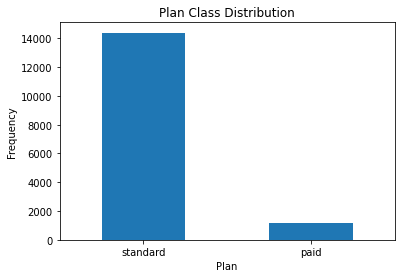

In [126]:
count_classes=pd.value_counts(df['plan'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Plan Class Distribution')
plt.xticks(range(2),labels)
plt.xlabel('Plan')
plt.ylabel('Frequency')
plt.show()

In [0]:
Standard=df[df['plan']==0]
Paid=df[df['plan']==1]

In [128]:
print(Standard.shape,Paid.shape)

(14394, 17) (1150, 17)


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [130]:
print(x_train.shape,y_train.shape)

(12435, 16) (12435,)


In [0]:
sampler=SMOTE()

In [132]:
x_train,y_train=sampler.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [133]:
x_train.shape

(23062, 16)

In [134]:
y_train.shape

(23062,)

In [135]:
print('Original dataset shape is : ',x_train.shape, ' and ',y_train.shape)
print('Resampled dataset shape is: ',x_train.shape,' and ',y_train.shape)

Original dataset shape is :  (23062, 16)  and  (23062,)
Resampled dataset shape is:  (23062, 16)  and  (23062,)


In [136]:
ssc=StandardScaler()
ssc.fit_transform(x_train)

array([[-0.01317101,  2.03164731, -1.06018693, ...,  0.        ,
         0.99046891,  1.50849449],
       [-0.01317101, -0.55170165,  1.08298025, ...,  0.        ,
        -1.17069833,  0.59573907],
       [-0.01317101, -0.55170165, -1.06018693, ...,  0.        ,
         0.99046891, -1.22977178],
       ...,
       [-0.01317101,  1.58316658, -1.06018693, ...,  0.        ,
         0.99046891, -0.96567453],
       [-0.01317101, -0.55170165,  1.08298025, ...,  0.        ,
         0.99046891, -0.47244995],
       [-0.01317101, -0.55170165,  1.08298025, ...,  0.        ,
        -0.31345246, -1.47622299]])

In [137]:
ssc.fit_transform(x_test)

array([[ 0.        , -0.57029329, -0.9192953 , ...,  0.        ,
         1.0310379 , -0.09328737],
       [ 0.        , -0.57029329,  1.08778974, ...,  0.        ,
         1.0310379 ,  0.79911392],
       [ 0.        ,  1.75348371, -0.9192953 , ...,  0.        ,
        -0.96989645, -1.58062284],
       ...,
       [ 0.        , -0.57029329,  1.08778974, ...,  0.        ,
        -0.96989645,  0.50164683],
       [ 0.        ,  1.75348371, -0.9192953 , ...,  0.        ,
         1.0310379 , -0.98568865],
       [ 0.        , -0.57029329,  1.08778974, ...,  0.        ,
         1.0310379 , -0.09328737]])

In [0]:
grid={'activation':['logistic','tanh', 'relu'],
      'learning_rate_init':[0.0001,0.001, 0.01, 0.1],
      'momentum':[0.2,0.3,0.5,0.7,0.9]
     }

In [0]:
mlp=MLPClassifier()
gs=GridSearchCV(mlp,grid,cv=3,scoring='accuracy')

In [140]:
gs_result=gs.fit(x_train,y_train)
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best: 0.888737 using {'activation': 'tanh', 'learning_rate_init': 0.001, 'momentum': 0.5}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp_pred=gs.predict(x_test)

In [142]:
print(accuracy_score(y_test,mlp_pred))

0.8678031521389514


In [143]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2863
           1       0.26      0.35      0.30       246

    accuracy                           0.87      3109
   macro avg       0.60      0.63      0.61      3109
weighted avg       0.89      0.87      0.88      3109

